In [1]:
import sympy as sy
import numpy as np
from scipy.optimize import fsolve
from plot_utils import analyze_sym

In [2]:
x = sy.symbols('x', real=True)

## Variants of Smooth Transition Function

In [3]:
_phi = sy.Piecewise((sy.exp(-1/x), x > 0), (0, True))
smoothtrans = sy.simplify(_phi / (_phi + _phi.subs(x, 1 - x)))
smoothtrans_f = sy.lambdify(x, smoothtrans)
smoothtrans

Piecewise((1/(exp(1/(x - 1) + 1/x) + 1), (x > 0) & (x < 1)), (1, x > 0), (0, x < 1))

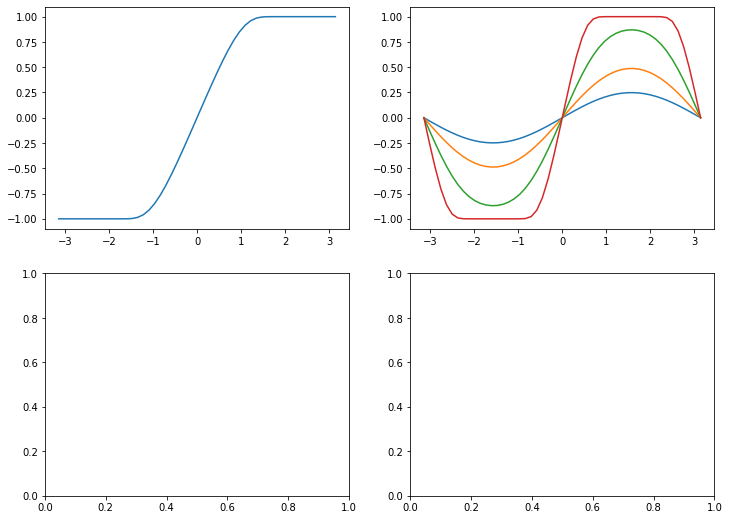

In [4]:
smoothclip = sy.simplify(2 * smoothtrans.subs(x, x/4 + 0.5) - 1)
smoothclip_f = sy.lambdify(x, smoothclip, "numpy")
analyze_sym(smoothclip)

## Variants of Airwindows Spiral

Note 1: original implementation by [Airwindows](), adapted according to the terms of the MIT license.

Note 2: this does not handle the case where `x == 0.0`, in which the function is undefined.

In [5]:
_spiral = sy.sin(x ** 2) / x
_sat_x = fsolve(sy.lambdify(x, sy.diff(_spiral, x), "numpy"),[1.1])[0]
_sat_y = sy.lambdify(x, _spiral, "numpy")(_sat_x)
spiral = _spiral.subs(x, x * _sat_y) / _sat_y
spiral_f = sy.lambdify(x, spiral, "numpy")
plt.plot(t, spiral_f(t))
spiral

NameError: name 'plt' is not defined

1.08812777116442*sin(1.16556118520723*tanh(0.788469737345486*x)**2)/tanh(0.788469737345486*x)

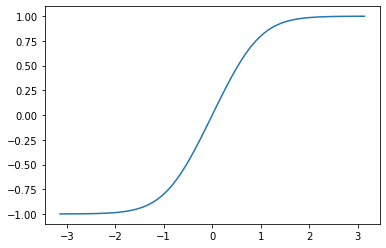

In [ ]:
_drive = _sat_x / _sat_y
tanh_spiral = spiral.subs(x, sy.tanh(x / _drive) * _drive)
tanh_spiral_f = sy.lambdify(x, tanh_spiral, "numpy")
plt.plot(t, tanh_spiral_f(t))
tanh_spiral

Piecewise((-1.08812777116442*sin(1.16556118520723*tanh(3.15387894938194*x/(0.62168452670966*x**2 - 4.0))**2)/tanh(3.15387894938194*x/(0.62168452670966*x**2 - 4.0)), (x > -2.53655898923062) & (x < 2.53655898923062)), (1.0, x > -2.53655898923062), (-1.0, x < 2.53655898923062))

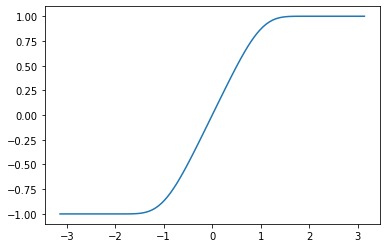

In [ ]:
smooth_spiral = sy.simplify(spiral.subs(x, smoothclip.subs(x, x / _drive) * _drive ))
smooth_spiral_f = sy.lambdify(x, smooth_spiral, "numpy")
plt.plot(t,smooth_spiral_f(t))
smooth_spiral